In [1]:
import scapy.all as sc
import matplotlib.pyplot as plt
from matplotlib import dates

import pandas as pd
import numpy as np
import datetime

In [2]:
four_to_2 = sc.rdpcap('data/analyze_4_to_2mb.cap')
four_to_1 = sc.rdpcap('data/analyze_4_to_1mb.cap')
four_to_05 = sc.rdpcap('data/analyze_4_to_05mb.cap')
four_to_025 = sc.rdpcap('data/analyze_4_to_025mb.cap')

In [3]:
baseline = sc.rdpcap('data/analyze_baseline.cap')
bn_500 = sc.rdpcap('data/analyze_500kb.cap')
bn_200 = sc.rdpcap('data/analyze_200kb.cap')
bn_100 = sc.rdpcap('data/analyze_100kb.cap')
bn_50 = sc.rdpcap('data/analyze_50kb.cap')

In [6]:
def pkts_to_grouped_df(pkts):
    times = [p.time for p in pkts]
    data = [p.len for p in pkts]
    datetimes = [datetime.datetime.fromtimestamp(c) for c in times]
    d = {'timestamp': datetimes, 'pkt_sizes': data}
    df = pd.DataFrame(data=d)
    grouped = df.groupby('timestamp')['pkt_sizes'].sum() / 1000 * 8
    grouped = grouped.to_frame()
    grouped['timestamp'] = grouped.index
    # Start time at "zero"
    print("grouped['timestamp'][0]", grouped['timestamp'][0])
    grouped['time_elapsed'] = grouped['timestamp'] - grouped['timestamp'][0]
    minutes_elapsed = [t.total_seconds() /60 for t in grouped.time_elapsed]
    grouped['minutes_elapsed'] = minutes_elapsed
    
    return grouped

In [7]:
baseline_df = pkts_to_grouped_df(baseline)
bn_500_df = pkts_to_grouped_df(bn_500)
bn_200_df = pkts_to_grouped_df(bn_200)
bn_100_df = pkts_to_grouped_df(bn_100)
bn_50_df = pkts_to_grouped_df(bn_50)


grouped['timestamp'][0] 2020-11-26 13:53:40
grouped['timestamp'][0] 2020-11-26 14:14:16
grouped['timestamp'][0] 2020-11-26 14:26:03
grouped['timestamp'][0] 2020-11-26 14:37:26
grouped['timestamp'][0] 2020-11-26 14:48:45


In [8]:
four_to_2_df = pkts_to_grouped_df(four_to_2)
four_to_1_df = pkts_to_grouped_df(four_to_1)
four_to_05_df = pkts_to_grouped_df(four_to_05)
four_to_025_df = pkts_to_grouped_df(four_to_025)


grouped['timestamp'][0] 2020-11-30 15:17:42
grouped['timestamp'][0] 2020-11-30 15:29:39
grouped['timestamp'][0] 2020-11-30 15:40:42
grouped['timestamp'][0] 2020-11-30 15:51:59


Text(0, 0.5, 'Video Flow Throughput (Kbps)')

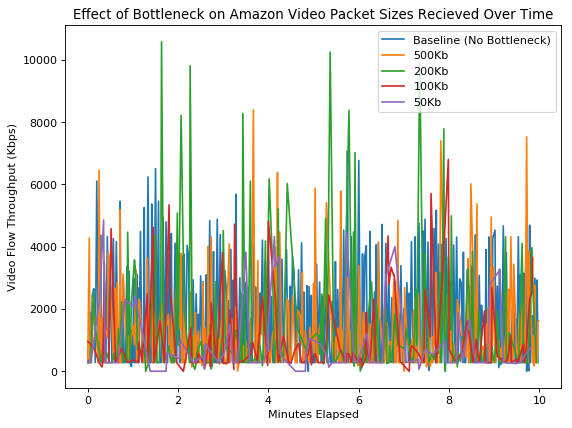

In [9]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(baseline_df['minutes_elapsed'], baseline_df['pkt_sizes'], label='Baseline (No Bottleneck)')
plt.plot(bn_500_df['minutes_elapsed'], bn_500_df['pkt_sizes'], label='500Kb')
plt.plot(bn_200_df['minutes_elapsed'], bn_200_df['pkt_sizes'], label='200Kb')
plt.plot(bn_100_df['minutes_elapsed'], bn_100_df['pkt_sizes'], label='100Kb')
plt.plot(bn_50_df['minutes_elapsed'], bn_50_df['pkt_sizes'], label='50Kb')

plt.legend()
plt.title('Effect of Bottleneck on Amazon Video Packet Sizes Recieved Over Time')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (Kbps)')

In [10]:
competing = sc.rdpcap('data/analyze_competing.cap')
competing_df = pkts_to_grouped_df(competing)


grouped['timestamp'][0] 2020-11-26 15:02:25


Text(0, 0.5, 'Video Flow Throughput (Kbps)')

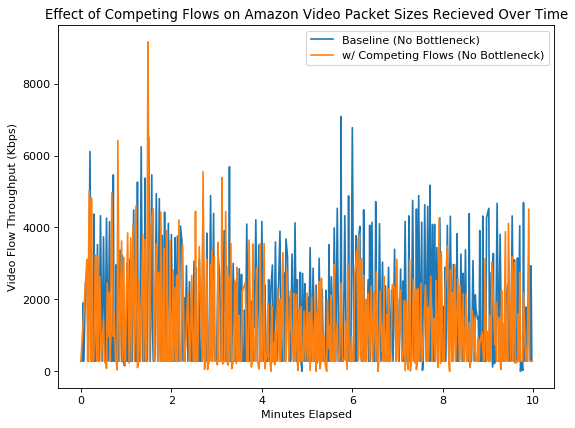

In [15]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(baseline_df['minutes_elapsed'], baseline_df['pkt_sizes'], label='Baseline (No Bottleneck)')
plt.plot(competing_df['minutes_elapsed'], competing_df['pkt_sizes'], label='w/ Competing Flows (No Bottleneck)')

plt.legend()
plt.title('Effect of Competing Flows on Amazon Video Packet Sizes Recieved Over Time')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (Kbps)')


Text(0, 0.5, 'Video Flow Throughput (Kbps)')

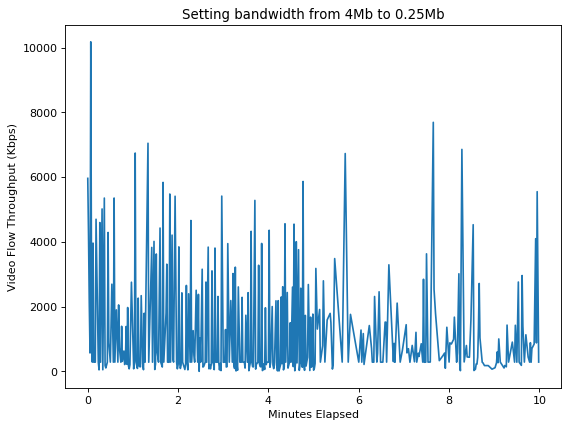

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(four_to_025_df['minutes_elapsed'], four_to_025_df['pkt_sizes'])
plt.title('Setting bandwidth from 4Mb to 0.25Mb')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (Kbps)')